#**Indranil Bain**
#**2020CSB039**
#**ML Assignment 1**

In [465]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [466]:
df = pd.read_csv('/content/train.csv')
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [467]:

df1 = df[['LotArea','SalePrice']]
df1.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


###Checking Any Missing Value is Present or not



In [468]:
df1.isnull().any()


LotArea      False
SalePrice    False
dtype: bool

In [469]:
df1['LotArea'].isnull().sum()


0

In [470]:
df1['SalePrice'].isnull().sum()


0

In [471]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['LotArea'],df['SalePrice'],train_size = 0.8)
x_train.shape

(1168,)

In [472]:

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(292, 1)

In [473]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [474]:


y_pred = model1.predict(x_test)
y_pred.shape

(292, 1)

In [475]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.07134689169937702


###Let's Plot The sample train data set and the Best Fit Line



###Calculate Slope and Intercept


In [476]:
slope = model1.coef_[0]
intercept = model1.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

Slope: [1.93934378]
Intercept: [160835.29204219]


In [477]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Slope: 32612.843599611195
Intercept: 178136.29259525522


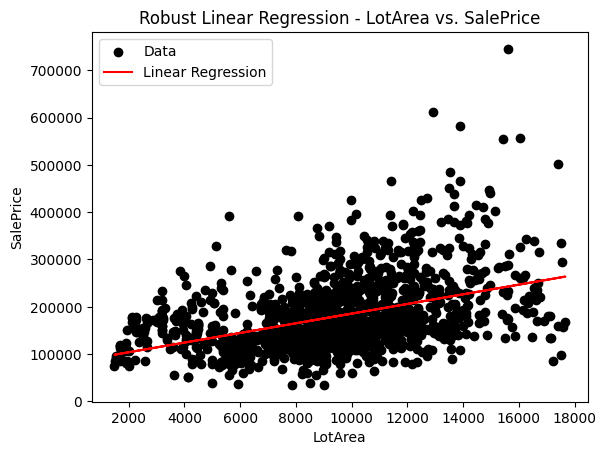

In [478]:
df.dropna(subset=['LotArea', 'SalePrice'], inplace=True)

Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['LotArea'] >= lower_bound) & (df['LotArea'] <= upper_bound)]


X_train = df[['LotArea']].values
y_train = df['SalePrice'].values

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

huber = LinearRegression()
huber.fit(X_train_normalized, y_train)

# Get the slope and intercept
slope = huber.coef_[0]
intercept = huber.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

# Plot the data points and the regression line
plt.scatter(X_train, y_train, color='black', label='Data')
plt.plot(X_train, huber.predict(X_train_normalized), color='red', label='Linear Regression')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Robust Linear Regression - LotArea vs. SalePrice')
plt.legend()
plt.show()

In [479]:
def mean_squared_error(y_true, y_pred):
    # Calculate the squared differences between true and predicted values
    squared_errors = (y_true - y_pred) ** 2

    # Calculate the mean of the squared differences
    mse = np.mean(squared_errors)

    return mse

##**Model 1: LotFrontage, LotArea**

In [480]:
df1 = df[['LotFrontage','LotArea','SalePrice']]
df1.head()

,LotFrontage,LotArea,SalePrice
0,65.0,8450,208500
1,80.0,9600,181500
2,68.0,11250,223500
3,60.0,9550,140000
4,84.0,14260,250000


In [481]:
df1.shape

(1391, 3)

In [482]:
df1.isnull().sum()

LotFrontage    233
LotArea          0
SalePrice        0
dtype: int64

In [483]:
df1.dropna(axis=0,inplace=True)
df1.shape

<ipython-input-483-acde98d29509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0,inplace=True)


(1158, 3)

In [484]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df1[['LotFrontage','LotArea']],df1['SalePrice'],train_size=0.8)
model1 = LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [485]:
y_pred1 = model1.predict(x_test1)
r2_1= r2_score(y_test1,y_pred1)
print("R2 Score : ",r2_1)
# print("Mean Squared Error : ",mean_squared_error(y_test1,y_pred1))

R2 Score :  0.1963377483220171


In [486]:
slope1 = model1.coef_[0]
intercept1 = model1.intercept_

print("Slope:", slope1)
print("Intercept:", intercept1)

Slope: 706.0535213900636
Intercept: 52901.633693265176


##**Model 2: LotFrontage, LotArea, OverallQual, OverallCond**


In [487]:
df2 = df[['LotFrontage','LotArea','OverallQual','OverallCond','SalePrice']]
df2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,SalePrice
0,65.0,8450,7,5,208500
1,80.0,9600,6,8,181500
2,68.0,11250,7,5,223500
3,60.0,9550,7,5,140000
4,84.0,14260,8,5,250000


In [488]:
df2.shape

(1391, 5)

In [489]:
df2.isnull().sum()

LotFrontage    233
LotArea          0
OverallQual      0
OverallCond      0
SalePrice        0
dtype: int64

In [490]:
df2.dropna(axis=0,inplace=True)

<ipython-input-490-7cc6f020b4a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,inplace=True)


In [491]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df2[['LotFrontage','LotArea','OverallQual','OverallCond']],df2['SalePrice'],train_size=0.8)
model2 = LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression()

In [492]:
y_pred2 = model2.predict(x_test2)
r2_2= r2_score(y_test2,y_pred2)
print("R2 Score : ",r2_2)
print("Mean Squared Error : ",mean_squared_error(y_test2,y_pred2))

R2 Score :  0.7785592633959165
Mean Squared Error :  1356327682.1040606


In [493]:
slope2 = model2.coef_[0]
intercept2 = model2.intercept_

print("Slope:", slope2)
print("Intercept:", intercept2)

Slope: 415.2138254840703
Intercept: -147018.14476752628


## **Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea**

In [494]:
df3 = df[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea','SalePrice']]
df3.head()

,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,GrLivArea,SalePrice
0,65.0,8450,7,5,856,1710,208500
1,80.0,9600,6,8,1262,1262,181500
2,68.0,11250,7,5,920,1786,223500
3,60.0,9550,7,5,961,1717,140000
4,84.0,14260,8,5,1145,2198,250000


In [495]:
df3.shape

(1391, 7)

In [496]:
df3.isnull().sum()

LotFrontage    233
LotArea          0
OverallQual      0
OverallCond      0
1stFlrSF         0
GrLivArea        0
SalePrice        0
dtype: int64

In [497]:
df3 = df3.dropna(axis=0)
df3.shape

(1158, 7)

In [498]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(df3[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea']],df3['SalePrice'],train_size=0.8)
model3 = LinearRegression()
model3.fit(x_train3,y_train3)

LinearRegression()

In [499]:
y_pred3 = model3.predict(x_test3)
r2_3 = r2_score(y_test3, y_pred3)
print("R2 Score : ",r2_3)
print("Mean Squared Error : ",mean_squared_error(y_test3,y_pred3))

R2 Score :  0.8049612868883286
Mean Squared Error :  1122762624.377745


In [500]:
slope3 = model3.coef_[0]
intercept3 = model3.intercept_

print("Slope:", slope3)
print("Intercept:", intercept3)

Slope: 186.13906389347122
Intercept: -150799.11579627203


## **Model 4: LotArea, Street**


In [501]:
df4 = df[['LotArea','Street','SalePrice']]
df4.head()

,LotArea,Street,SalePrice
0,8450,Pave,208500
1,9600,Pave,181500
2,11250,Pave,223500
3,9550,Pave,140000
4,14260,Pave,250000


In [502]:
df4.isnull().any()

LotArea      False
Street       False
SalePrice    False
dtype: bool

In [503]:
df4['Street'].nunique()

2

In [504]:
df4.shape

(1391, 3)

In [505]:
df4['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [506]:
# Select the column you want to one-hot encode
column_to_encode = 'Street'
column_data = df4[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df4 = pd.concat([df4.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df4.head()

,LotArea,SalePrice,Street_Grvl,Street_Pave
0,8450.0,208500.0,0.0,1.0
1,9600.0,181500.0,0.0,1.0
2,11250.0,223500.0,0.0,1.0
3,9550.0,140000.0,0.0,1.0
4,14260.0,250000.0,0.0,1.0


In [507]:
df4.shape

(1455, 4)

In [508]:
df4.isnull().sum()

LotArea        64
SalePrice      64
Street_Grvl    64
Street_Pave    64
dtype: int64

In [509]:
df4.head()

,LotArea,SalePrice,Street_Grvl,Street_Pave
0,8450.0,208500.0,0.0,1.0
1,9600.0,181500.0,0.0,1.0
2,11250.0,223500.0,0.0,1.0
3,9550.0,140000.0,0.0,1.0
4,14260.0,250000.0,0.0,1.0


In [510]:
df4.isnull().any()

LotArea        True
SalePrice      True
Street_Grvl    True
Street_Pave    True
dtype: bool

In [511]:
# df4 = df4.dropna(axis=0)
df4.dropna(axis=0,inplace=True)

In [512]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(df4[['LotArea','Street_Grvl','Street_Pave']],df4['SalePrice'],train_size=0.8)
model4 = LinearRegression()
# x_train4 = np.array(x_train4).reshape(-1,1)
# x_test4 = np.array(x_test4).reshape(-1,1)
# y_train4 = np.array(y_train4).reshape(-1,1)
# y_test4 = np.array(x_test4).reshape(-1,1)

model4.fit(x_train4,y_train4)

LinearRegression()

In [513]:
y_pred4 = model4.predict(x_test4)
r2_4 = r2_score(y_test4,y_pred4)
print("R2 Score : ",r2_4)
print("Mean Squared Error : ",mean_squared_error(y_test4,y_pred4))

R2 Score :  0.15876855386780908
Mean Squared Error :  4104867355.4336057


In [514]:
slope4 = model4.coef_[0]
intercept4 = model4.intercept_

print("Slope:", slope4)
print("Intercept:", intercept4)

Slope: 10.614153697434354
Intercept: 97124.79506253726


## **Model 5: LotArea, OverallCond, Street, Neighborhood**


In [515]:
df5 = df[['LotArea','Street','OverallCond','Neighborhood','SalePrice']]
df5.head()

,LotArea,Street,OverallCond,Neighborhood,SalePrice
0,8450,Pave,5,CollgCr,208500
1,9600,Pave,8,Veenker,181500
2,11250,Pave,5,CollgCr,223500
3,9550,Pave,5,Crawfor,140000
4,14260,Pave,5,NoRidge,250000


In [516]:
df5['Neighborhood'].nunique()


25

In [517]:
df5.shape


(1391, 5)

In [518]:
# Select the column you want to one-hot encode
column_to_encode = 'Neighborhood'
column_data = df5[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df5 = pd.concat([df5.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df5.head()

,LotArea,Street,OverallCond,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450.0,Pave,5.0,208500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600.0,Pave,8.0,181500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11250.0,Pave,5.0,223500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550.0,Pave,5.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260.0,Pave,5.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [519]:

column_to_encode = 'Street'
column_data = df5[[column_to_encode]]
one_hot_encoded = encoder.fit_transform(column_data)
one_hot_encoded_array = one_hot_encoded.toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))
df5 = pd.concat([df5.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)
df5.head()



,LotArea,OverallCond,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Street_nan
0,8450.0,5.0,208500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600.0,8.0,181500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,11250.0,5.0,223500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550.0,5.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14260.0,5.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [520]:
df5.dropna(axis=0,inplace=True)

In [521]:
target = df5['SalePrice']
df5 = df5.drop(['SalePrice'],axis=1)


In [522]:
df5.head()


,LotArea,OverallCond,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Street_nan
0,8450.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,11250.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14260.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [523]:
target


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1386    250000.0
1387    136000.0
1388    377500.0
1389    131000.0
1390    235000.0
Name: SalePrice, Length: 1327, dtype: float64

In [524]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(df5,target,train_size=0.8)
model5 = LinearRegression()
model5.fit(x_train5,y_train5)

LinearRegression()

In [525]:
y_pred5 = model5.predict(x_test5)
r2_5 = r2_score(y_test5, y_pred5)
print("R2 Score : ",r2_5)
print("Mean Squared Error : ",mean_squared_error(y_test5,y_pred5))

R2 Score :  0.1300129527177708
Mean Squared Error :  4700536656.808294


In [526]:
slope5 = model5.coef_[0]
intercept5 = model5.intercept_

print("Slope:", slope5)
print("Intercept:", intercept5)

Slope: 10.38775370020335
Intercept: 105051.8995223769


## **Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year**


In [527]:
df6 = df[['LotArea','OverallCond', 'Street', '1stFlrSF', 'Neighborhood','SalePrice']]
df6.head()

,LotArea,OverallCond,Street,1stFlrSF,Neighborhood,SalePrice
0,8450,5,Pave,856,CollgCr,208500
1,9600,8,Pave,1262,Veenker,181500
2,11250,5,Pave,920,CollgCr,223500
3,9550,5,Pave,961,Crawfor,140000
4,14260,5,Pave,1145,NoRidge,250000


In [528]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [529]:
# Select the column you want to one-hot encode
column_to_encode = 'Neighborhood'
column_data = df6[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df6 = pd.concat([df6.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df6.head()

,LotArea,OverallCond,Street,1stFlrSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450.0,5.0,Pave,856.0,208500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600.0,8.0,Pave,1262.0,181500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11250.0,5.0,Pave,920.0,223500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550.0,5.0,Pave,961.0,140000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260.0,5.0,Pave,1145.0,250000.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [530]:
column_to_encode = 'Street'
column_data = df6[[column_to_encode]]
one_hot_encoded = encoder.fit_transform(column_data)
one_hot_encoded_array = one_hot_encoded.toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))
df6 = pd.concat([df6.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)
df6.head()

,LotArea,OverallCond,1stFlrSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Street_nan
0,8450.0,5.0,856.0,208500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600.0,8.0,1262.0,181500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,11250.0,5.0,920.0,223500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550.0,5.0,961.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14260.0,5.0,1145.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [531]:
df6.dropna(axis=0,inplace=True)

In [532]:
target6 = df6['SalePrice']
df6 = df6.drop(['SalePrice'],axis=1)
x_train6,x_test6,y_train6,y_test6 = train_test_split(df6,target6,train_size=0.8)
model6 = LinearRegression()
model6.fit(x_train6,y_train6)

LinearRegression()

In [533]:
y_pred6 = model6.predict(x_test6)
r2_6 = r2_score(y_test6,y_pred6)
print("R2 Score: ",r2_6)
print("Mean Squared Error : ",mean_squared_error(y_test6,y_pred6))

R2 Score:  0.4618803629270799
Mean Squared Error :  3667616125.459418


In [534]:
slope6 = model6.coef_[0]
intercept6 = model6.intercept_

print("Slope:", slope6)
print("Intercept:", intercept6)

Slope: 3.9658896309960925
Intercept: 2389.5485131267924


In [535]:
c1 = model1.coef_[1]
c2 = model2.coef_[1]
c3 = model3.coef_[1]
c4 = model4.coef_[0]
c5 = model5.coef_[0]
c6 = model6.coef_[0]

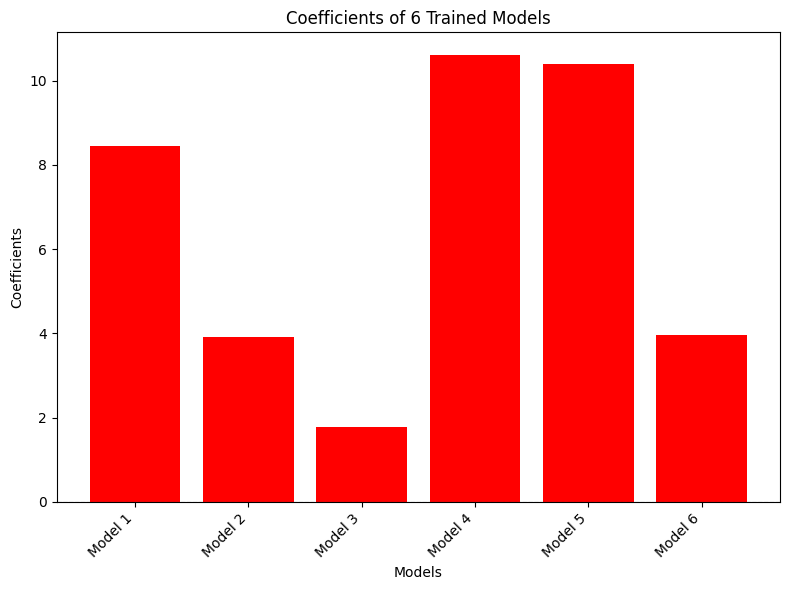

In [536]:
import matplotlib.pyplot as plt

# Assuming you have 6 coefficients stored in a list or array called 'coefficients'
coefficients = [c1,c2,c3,c4,c5,c6]

# Names of the features (optional, just for labeling the bars)
feature_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Plot the coefficients using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(coefficients)), coefficients, tick_label=feature_names, color='red')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
plt.xlabel('Models')
plt.ylabel('Coefficients')
plt.title('Coefficients of 6 Trained Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


## **Polynomial Regression (Degree 2)**


In [537]:
from sklearn.preprocessing import PolynomialFeatures
df7 = df[['LotArea','SalePrice']]
df7.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [538]:
x = df7['LotArea']
y = df7['SalePrice']
x = np.array(x).reshape(-1,1)
# Polynomial regression with degree 2
poly_features = PolynomialFeatures(degree=2)
x_poly2 = poly_features.fit_transform(x)
x_train7,x_test7,y_train7,y_test7 = train_test_split(x_poly2,y,train_size=0.8)

In [539]:
model7 = LinearRegression()
model7.fit(x_train7, y_train7)

LinearRegression()

In [540]:
# Predict the values using the model
y_pred7 = model7.predict(x_test7)

In [541]:
x_train7
y_pred7 = model7.predict(x_test7)
r2_7 = r2_score(y_test7,y_pred7)
print("R2 Score: ",r2_7)
print("Mean Squared Error : ",mean_squared_error(y_test7,y_pred7))

R2 Score:  0.1739963817404826
Mean Squared Error :  4920928947.986283


In [542]:

df8 = df[['LotArea','SalePrice']]
df8.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [543]:

x = df8['LotArea']
y = df8['SalePrice']
x = np.array(x).reshape(-1,1)
# Polynomial regression with degree 3
poly_features = PolynomialFeatures(degree=3)
x_poly3 = poly_features.fit_transform(x)
x_train8,x_test8,y_train8,y_test8= train_test_split(x_poly3,y,train_size=0.8)


In [544]:
model8 = LinearRegression()
model8.fit(x_train8, y_train8)

LinearRegression()

In [545]:
# Predict the values using the model
y_pred8 = model8.predict(x_test8)
r2_8 = r2_score(y_test8,y_pred8)
print("R2 Score: ",r2_8)
print("Mean Squared Error : ",mean_squared_error(y_test8,y_pred8))

R2 Score:  0.1283236140539712
Mean Squared Error :  3793389619.5334477
